### **Understanding Phishing Detection Features**  
Phishing detection is based on analyzing URL structures, domain properties, and webpage behaviors. The dataset contains several features that help classify a website as **legitimate (1)** or **phishing (-1)**.

---

## **Column Breakdown & Cybersecurity Perspective**  

### **1. URL-Based Features** (Indicators in the URL itself)
| Feature | Explanation | Cybersecurity Perspective |
|---------|------------|--------------------------|
| **having_IP_Address** | 1 if the URL contains an IP address instead of a domain name, -1 otherwise | Phishing sites often use direct IP addresses instead of registered domains. Legitimate websites usually have proper domain names. |
| **URL_Length** | Measures the number of characters in the URL | Phishing sites often use long URLs to obfuscate the true domain or add unnecessary parameters. |
| **Shortening_Service** | 1 if a URL shortener (bit.ly, tinyurl, etc.) is used | Attackers use shortened URLs to hide malicious links and trick users into clicking. |
| **having_At_Symbol (@)** | 1 if the URL contains '@' symbol | The `@` symbol in URLs redirects users to different sites, a common phishing technique. |

---

### **2. Domain-Based Features** (Properties of the domain name)
| Feature | Explanation | Cybersecurity Perspective |
|---------|------------|--------------------------|
| **double_slash_redirecting** | 1 if "//" appears somewhere after the first "http://" or "https://" | Phishers use double slashes to obscure redirections to fake sites. |
| **Prefix/Suffix (-)** | 1 if domain name contains ‘-’ | Legitimate domains rarely use hyphens; phishers use them to mimic real domains (e.g., `pay-pal.com`). |
| **Subdomain_Count** | Measures the number of subdomains | Phishing sites may use multiple subdomains to appear similar to trusted domains (e.g., `login.bank.secure.com`). |
| **HTTPS_Token** | 1 if "https" appears in the domain name instead of a valid SSL certificate | Attackers add "https" in subdomains to make fake sites look legitimate. |

---

### **3. SSL & Certificate-Based Features** (Trustworthiness of website security)
| Feature | Explanation | Cybersecurity Perspective |
|---------|------------|--------------------------|
| **SSLfinal_State** | Checks if the website uses SSL/TLS certificates | A missing or expired SSL certificate is a red flag for phishing. |
| **Domain_Registeration_Length** | Measures the duration for which a domain is registered | Phishing sites have short lifespans (a few months), while legitimate businesses register domains for years. |
| **Favicon** | 1 if the favicon is loaded from an external source | Legitimate sites have favicons stored within their domain; phishers often hotlink favicons from other sites. |

---

### **4. HTML & JavaScript Features** (Manipulation within webpage code)
| Feature | Explanation | Cybersecurity Perspective |
|---------|------------|--------------------------|
| **port** | Checks if ports like 8080, 443, etc., are open | Non-standard ports are often used by phishing servers to evade detection. |
| **Iframe_Redirection** | 1 if an iframe exists | Phishing sites use iframes to load content from different malicious sources. |
| **onmouseover** | Checks for `onmouseover` JavaScript event | Attackers use this event to change the displayed URL when a user hovers over a link. |
| **RightClick_Disabled** | 1 if right-click is disabled | Phishing sites disable right-click to prevent users from inspecting the page source. |
| **popUpWidnow** | 1 if a pop-up appears | Phishing sites use pop-ups to force user interaction and credential submission. |

---

### **5. Reputation & Traffic-Based Features** (User interaction data)
| Feature | Explanation | Cybersecurity Perspective |
|---------|------------|--------------------------|
| **DNS_Record** | 1 if the website has a valid DNS record | Phishing domains may not have long-term DNS records as they are created temporarily. |
| **Web_Traffic** | Measures site traffic using Alexa ranking | High-traffic sites are typically legitimate, while phishing domains have little to no traffic. |
| **Google_Index** | 1 if Google has indexed the website | Phishing sites are often unindexed or blacklisted by Google. |
| **Page_Rank** | Determines the credibility of a website using SEO ranking | Phishing sites have low page rankings. |

---

## **How These Features Help in Phishing Detection?**
1. **Phishing Websites Have Unusual URLs:**  
   - Many phishing sites have **long URLs**, contain **IP addresses**, or use **shortened URLs**.  
   - **Example:** `http://192.168.1.10/login.html` instead of `https://bank.com/login`.  

2. **Domain Name Anomalies:**  
   - Attackers use **hyphens (-)** and **subdomains** to make fake sites look real.  
   - **Example:** `secure-paypal.com` vs. `paypal.com`.  

3. **Lack of Security & Trust Indicators:**  
   - **Missing SSL certificates** or **short domain registration periods** are red flags.  
   - **Example:** Fake banking sites often don’t have HTTPS or valid certificates.  

4. **JavaScript & HTML Tricks:**  
   - Attackers use **iframing, pop-ups, and JavaScript tricks** to steal user data.  
   - **Example:** A site disables **right-click** to prevent users from checking its source code.  

5. **Reputation & Search Engine Visibility:**  
   - Phishing websites often have **low web traffic** and are **not indexed by Google**.  

---

## **Conclusion**
- The **combination** of these features helps to detect phishing sites.  
- **Machine Learning Algorithms** analyze these features to **classify** websites as phishing or legitimate.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import joblib

In [2]:
# Load the dataset
df = pd.read_csv("../Datasets/uci-ml-phishing-dataset.csv")

In [3]:
# Print first five datasets
df.head()

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df.info()  # Overview of dataset (columns, types, missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           11055 non-null  int64
 1   having_IP_Address            11055 non-null  int64
 2   URL_Length                   11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [5]:
df.shape  # Dimensions (rows, columns)

(11055, 32)

In [6]:
df.columns  # List of column names

Index(['id', 'having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [7]:
df.head(5)  # First 5 rows

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [8]:
df.tail(5)  # Last 5 rows

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,11051,1,-1,1,-1,1,1,1,1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,...,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,11055,-1,-1,1,1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [9]:
df.describe()  # Summary statistics for numerical columns

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.describe(include='all')  # Summary for all columns, including categorical

,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.nunique()  # Number of unique values per column

id                             11055
having_IP_Address                  2
URL_Length                         3
Shortining_Service                 2
having_At_Symbol                   2
double_slash_redirecting           2
Prefix_Suffix                      2
having_Sub_Domain                  3
SSLfinal_State                     3
Domain_registeration_length        2
Favicon                            2
port                               2
HTTPS_token                        2
Request_URL                        2
URL_of_Anchor                      3
Links_in_tags                      3
SFH                                3
Submitting_to_email                2
Abnormal_URL                       2
Redirect                           2
on_mouseover                       2
RightClick                         2
popUpWidnow                        2
Iframe                             2
age_of_domain                      2
DNSRecord                          2
web_traffic                        3
P

In [12]:
print("The duplicated values in Datasets:",df.duplicated().sum())  # Count duplicate rows

The duplicated values in Datasets: 0


In [13]:
# Drop unnecessary column
df.drop(columns=['id'], inplace=True)

In [14]:
# Check for remaining columns
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [15]:
df.dtypes  # Data types of each column

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [16]:
df['Result'].value_counts()  # Frequency count of target variable

Result
 1    6157
-1    4898
Name: count, dtype: int64

In [17]:
df['Result'].value_counts(normalize=True)  # Proportions of target variable

Result
 1    0.556943
-1    0.443057
Name: proportion, dtype: float64

In [18]:
# Check for missing values
display("Missing values per column:", df.isnull().sum())

'Missing values per column:'

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

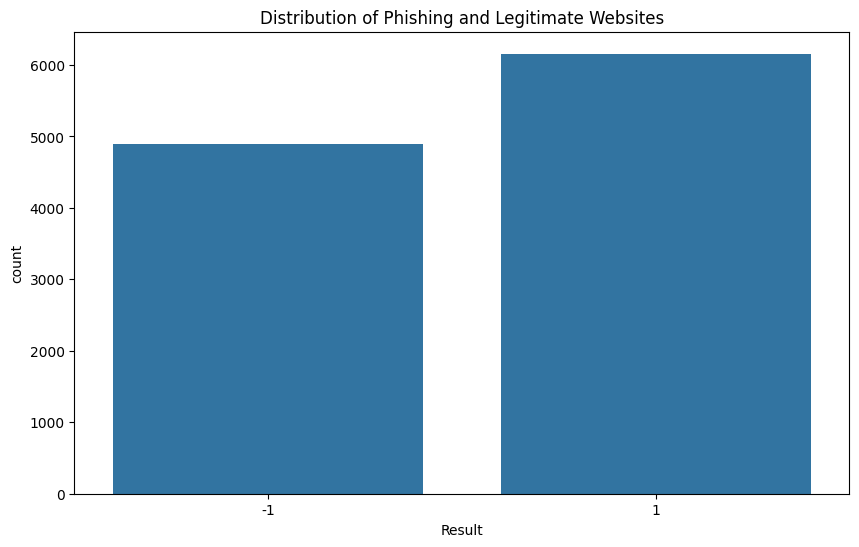

In [19]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='Result', data=df)
plt.title("Distribution of Phishing and Legitimate Websites")
plt.show()

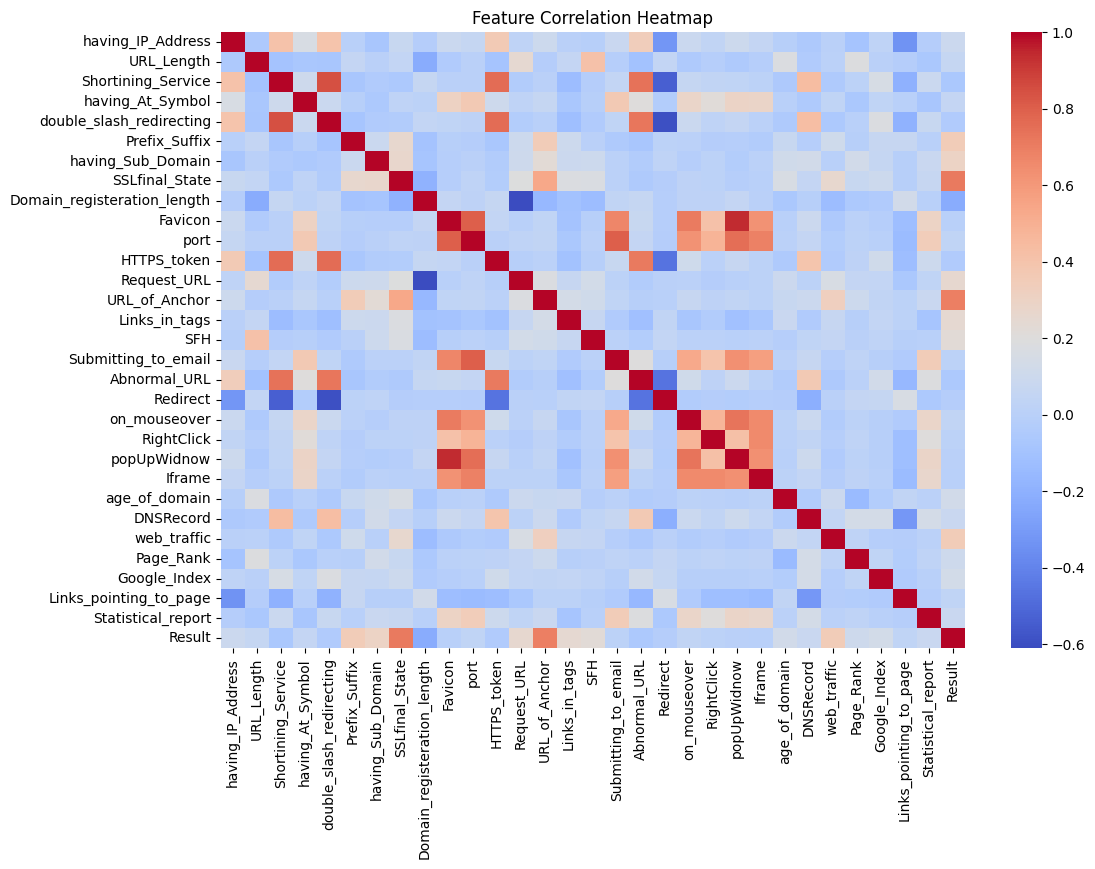

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
# Split features and target
X = df.drop(columns=['Result'])
y = df['Result']

In [22]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_log))


Logistic Regression Results:
Accuracy: 0.9285391225689733
Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.90      0.92       980
           1       0.92      0.95      0.94      1231

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

Confusion Matrix:
 [[ 883   97]
 [  61 1170]]
ROC AUC Score: 0.9808024834629221


In [25]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))

Random Forest Results:
Accuracy: 0.9742198100407056
Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.96      0.97       980
           1       0.97      0.98      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Confusion Matrix:
 [[ 942   38]
 [  19 1212]]
ROC AUC Score: 0.9976947562128018


In [26]:
# SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_svm))

SVM Results:
Accuracy: 0.9516056083220262
Classification Report:
               precision    recall  f1-score   support

          -1       0.96      0.92      0.94       980
           1       0.94      0.97      0.96      1231

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211

Confusion Matrix:
 [[ 906   74]
 [  33 1198]]
ROC AUC Score: 0.9893267461330592


In [27]:
# Model Comparison Visualization
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm)]
roc_aucs = [roc_auc_score(y_test, y_prob_log), roc_auc_score(y_test, y_prob_rf), roc_auc_score(y_test, y_prob_svm)]

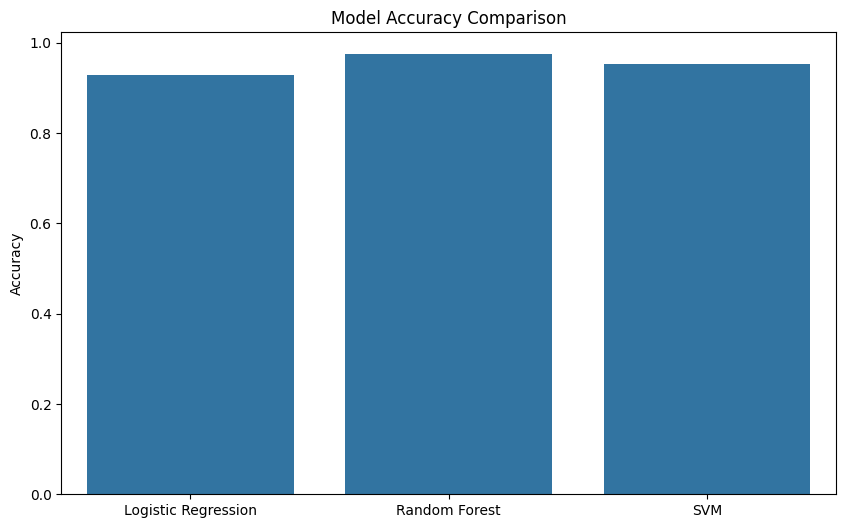

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

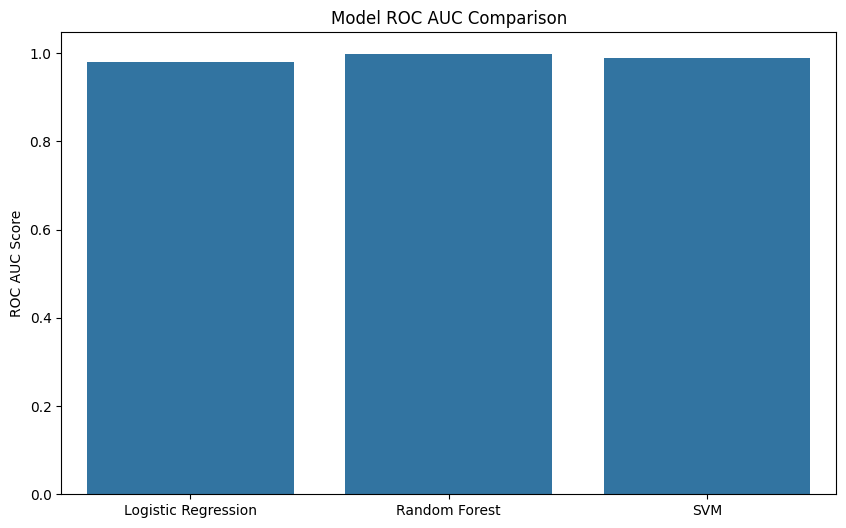

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=roc_aucs)
plt.title("Model ROC AUC Comparison")
plt.ylabel("ROC AUC Score")
plt.show()

In [30]:
# Save the best model
best_model_name = models[np.argmax(accuracies)]
best_model = {'Logistic Regression': log_reg, 'Random Forest': rf, 'SVM': svm}[best_model_name]
joblib.dump(best_model, "../models/best_phishing_model.pkl")
print(f"Best model ({best_model_name}) saved as best_phishing_model.pkl")

Best model (Random Forest) saved as best_phishing_model.pkl
